# 피해 경험 후 취한 행동

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl                 # 패키지 관련
import matplotlib.font_manager as fm 
import numpy as np


# ================================================================================
# 함수 이름 : clean
# 함수 기능 : 행과 열 인덱스를 맞춤
# 변     수 : 파일을 지정해야하여 변수로 설정해야함
# ----------------------------------------------------------
def clean(file):
    # 1열은 필요없으므로 건너뛴 상태로 csv파일 부름
    F = pd.read_csv(file, skiprows = 1)       

    # 형변환
    F['특성별(1)'] = F['특성별(1)'].astype('category')
    F['특성별(2)'] = F['특성별(2)'].astype('category')

    # 멀티인덱스 설정
    F.set_index(['특성별(1)','특성별(2)'], inplace = True)

    # 정보 확인
    F.info()

    # 들어온 파라미터의 원본을 최종적으로 저장
    file = F

    return file

# --------------------------------------------------------------------------
# 함수 이름 : select
# 매개 변수 : F (데이터 프레임 변수 이름), indexC (행 인덱스 이름)
# 함수 기능 : 데이터 프레임에서 해당 인덱스 열을 뽑아줌 (DataFrame 형식)
# --------------------------------------------------------------------------
def select(F, indexC):
        result = F.xs(indexC, level = 0)
        return result



# --------------------------------------------------------------------------
# 함수 이름 : ana
# 매개 변수 : name
# 함수 기능 : 각 프레임을 보여주고 describe한 결과를 보여줌
# --------------------------------------------------------------------------
def ana(name):
    print(name)
    print()
    print(name.T.describe())
    print()
    print()
    print()



# --------------------------------------------------------------------------
# 함수 이름 : calc
# 매개 변수 : dfName
# 함수 기능 : 설문조사 결과를 점수화해서 평균을 데이터프레임에 넣음
# 주     의 : 복사 관련 warning 발생 (원본이 바뀜)
# --------------------------------------------------------------------------
def calc(dfName):
    dfName.columns = [0, 1, 2, 3]                                             # 점수로 환산
    dfName['평균'] = 0                                                        # 평균 열 만듬
    result = (dfName[1] + 2*dfName[2] + 3*dfName[3])/100                      #평균 계산
    dfName['평균'] = result                                                   #평균열 값에 없음
    dfName.columns = ['전혀 그렇지 않다', '그렇지 않다', '그렇다',
                      '매우 그렇다', '평균']                                   #열이름 초기화
    return dfName


# --------------------------------------------------------------------------
# 함수 이름 : calc2
# 매개 변수 : dfName
# 함수 기능 : 설문조사 결과를 점수화해서 평균을 데이터프레임에 넣음
# 주     의 : 원본은 그대로, 복사본이 생성됨
# --------------------------------------------------------------------------
def calc2(dfName):
    dfName2 = dfName.copy()
    dfName2.columns = [0, 1, 2, 3]                                             # 점수로 환산
    dfName2['평균'] = 0                                                        # 평균 열 만듬
    result = (dfName2[1] + 2*dfName2[2] + 3*dfName2[3])/100                      #평균 계산
    dfName2['평균'] = result                                                   #평균열 값에 없음
    dfName2.columns = ['전혀 그렇지 않다', '그렇지 않다', '그렇다',
                      '매우 그렇다', '평균']                                   #열이름 초기화
    return dfName2

In [20]:
# 폰트 파일의 경로 저장
font_path = r'C:\Windows\Fonts\gulim.ttc'
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

# 성인

In [21]:
def graph2_ad(data_name, x):
    # 전체 크기 설정
    plt.figure(figsize=(15,10))
    # 각 데이터 프레임 별로 시각화를 함
    graph = data_name.plot(kind = 'bar', grid = True, xlabel = x , ylabel ='백분위', rot = 10, fontsize = 'small')
    graph = plt.xlabel(x, loc = 'right', fontsize = 'large')
    graph = plt.ylabel('백분위', loc = 'top', fontsize = 'large')
    graph = plt.title('[성인 - 피해 경험 후 취한 행동]')
    graph = plt.legend(['1번', '2번', '3번', '4번', '5번', '6번'], fontsize = 'xx-small')

In [22]:
file1 = '../data_adult/성인피해_설문5_사이버폭력_피해_경험_후_취한_행동.csv'
file1 = clean(file1)

# 필요한 데이터 프레임만 선택하여 데이터프레임으로 만들었음
gender = select(file1, '성별')
age = select(file1, '연령별')
degree = select(file1, '학력별')
job = select(file1, '직업별')
area = select(file1, '거주지역별')
hour = select(file1, '인터넷 이용시간별')
edu = select(file1, '사이버폭력예방교육별')

# transpose를 하는게 좋을까??

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   가해자를 차단하거나 나의 아이디나 이메일을 삭제 또는 변경하였다  52 non-null     float64
 1   아무런 행동도 하지 않았다                       52 non-null     float64
 2   가해자에게 직접 삭제하도록 하거나 사과를 요구하였다         52 non-null     float64
 3   가족 친구선·후배 동료 등 주변에 알리거나 도움을 요청하였다    52 non-null     float64
 4   해당 웹사이트나 상담센터 또는 경찰에 신고했다            52 non-null     float64
 5   가해자에게 보복하거나 다른 사람을 대신 괴롭혔다           52 non-null     float64
dtypes: float64(6)
memory usage: 5.9 KB


<Figure size 1500x1000 with 0 Axes>

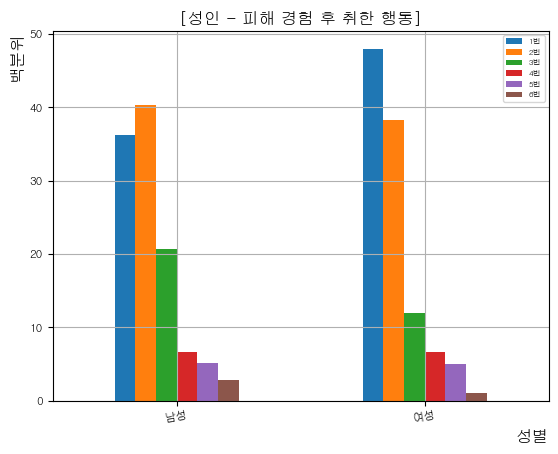

<Figure size 1500x1000 with 0 Axes>

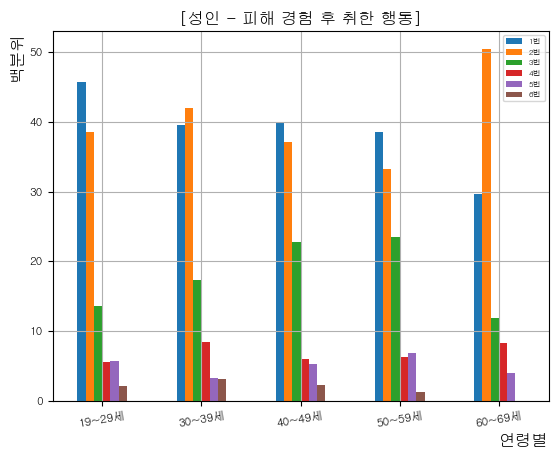

<Figure size 1500x1000 with 0 Axes>

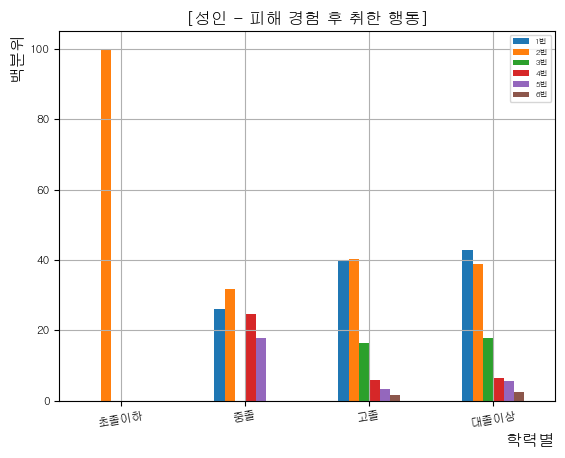

<Figure size 1500x1000 with 0 Axes>

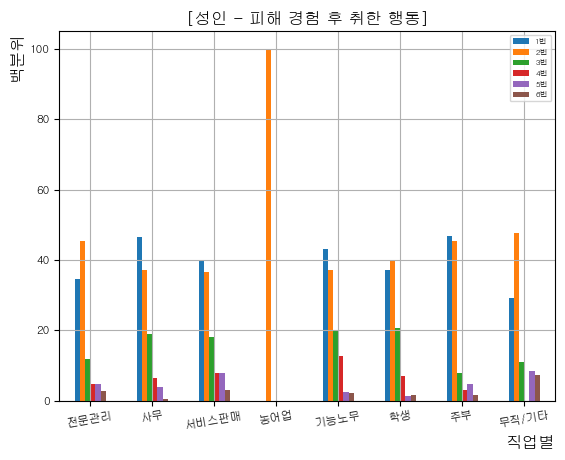

<Figure size 1500x1000 with 0 Axes>

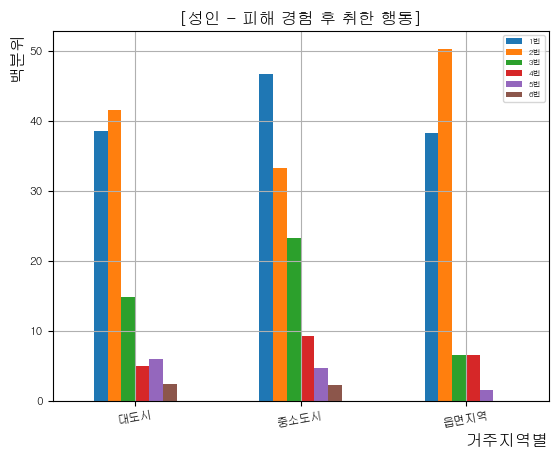

<Figure size 1500x1000 with 0 Axes>

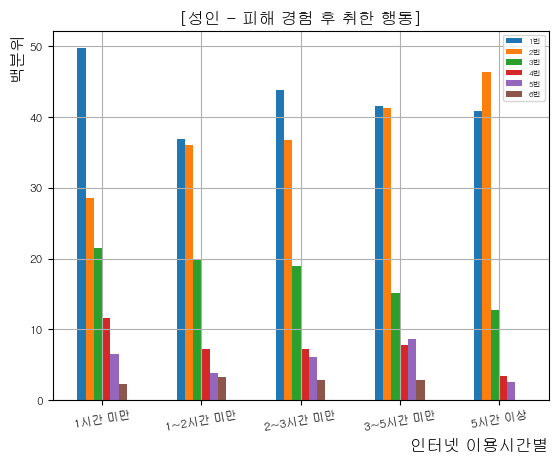

<Figure size 1500x1000 with 0 Axes>

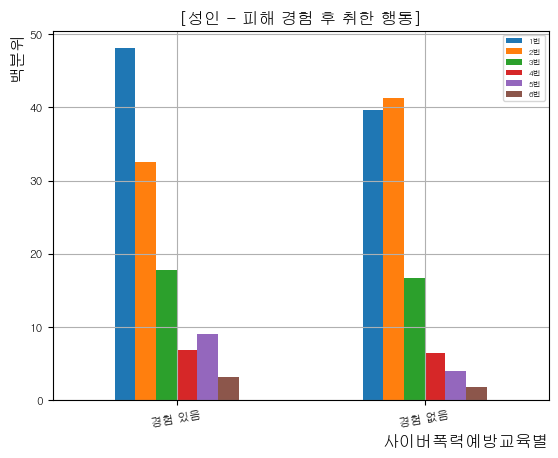

In [23]:
graph2_ad(gender, '성별')
graph2_ad(age, '연령별')
graph2_ad(degree, '학력별')
graph2_ad(job, '직업별')
graph2_ad(area, '거주지역별')
graph2_ad(hour, '인터넷 이용시간별')
graph2_ad(edu, '사이버폭력예방교육별')

# 학생

In [24]:
def graph2_stu(data_name, x):
    # 전체 크기 설정
    plt.figure(figsize=(15,10))
    # 각 데이터 프레임 별로 시각화를 함
    graph = data_name.plot(kind = 'bar', grid = True, xlabel = x , ylabel ='백분위', rot = 10, fontsize = 'small')
    graph = plt.xlabel(x, loc = 'right', fontsize = 'large')
    graph = plt.ylabel('백분위', loc = 'top', fontsize = 'large')
    graph = plt.title('[학생 - 피해 경험 후 취한 행동]')
    graph = plt.legend(['1번', '2번', '3번', '4번', '5번', '6번'], fontsize = 'xx-small')

In [25]:
# 파일 부르기
file = '../data_student/학생피해_설문5_사이버폭력_피해_경험_후_취한_행동.csv'
file = clean(file)

# 필요한 데이터프레임 가져오기
gender = select(file, '성별')
school = select(file, '학령별')
area = select(file, '거주지역별')
hour = select(file, '인터넷 이용 시간별')
family = select(file, '가정형편별')
score = select(file, '학업성적별')
edu = select(file, '사이버폭력 예방교육별')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   가해자를 차단 하거나 나의 아이디나 이메일을 삭제 또는 변경하였다       30 non-null     float64
 1   가해자에게 직접 삭제하도록 하거나 사과를 요구하였다               30 non-null     float64
 2   가족 친구 선·후배 선생님등 주변에 알리거나 도움을 요청하였다         30 non-null     float64
 3   아무런 행동도 하지 않았다                             30 non-null     float64
 4   해당 웹사이트나 상담센터 또는 경찰(학교폭력 신고센터 117등)에 신고했다  30 non-null     float64
 5   가해자에게 보복하거나 다른 사람을 대신 괴롭혔다                 30 non-null     float64
dtypes: float64(6)
memory usage: 3.3 KB


<Figure size 1500x1000 with 0 Axes>

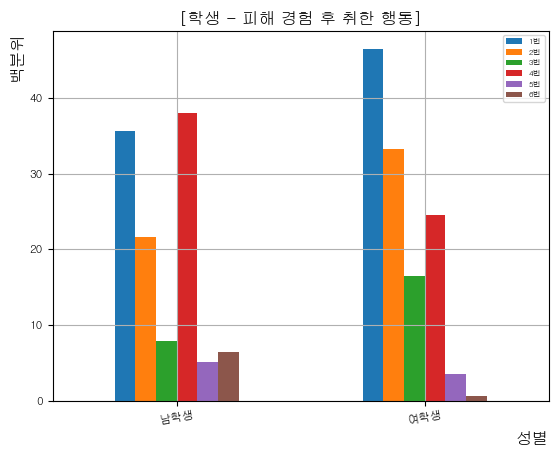

<Figure size 1500x1000 with 0 Axes>

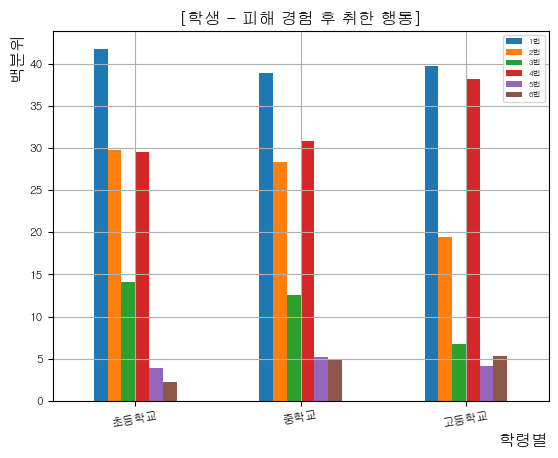

<Figure size 1500x1000 with 0 Axes>

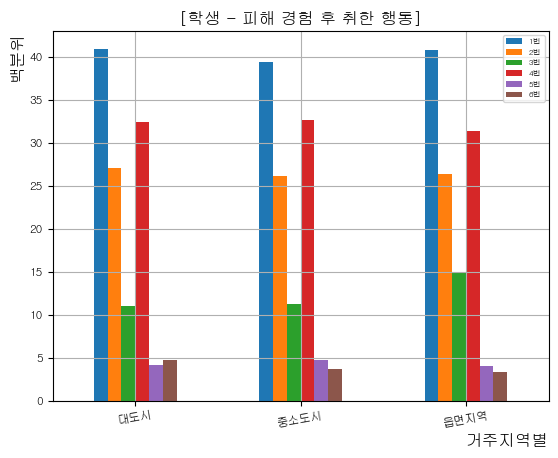

<Figure size 1500x1000 with 0 Axes>

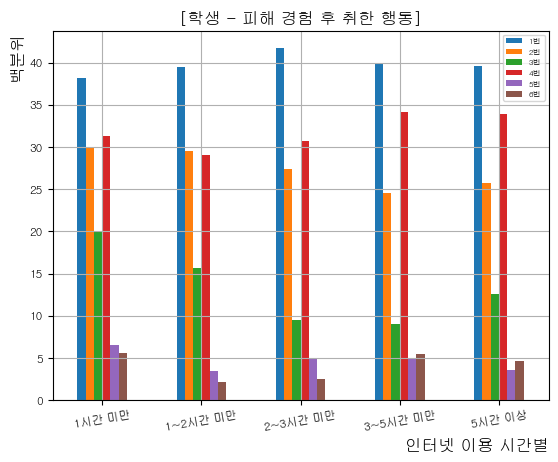

<Figure size 1500x1000 with 0 Axes>

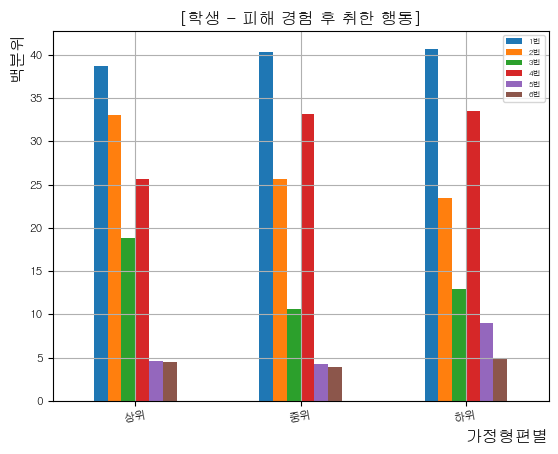

<Figure size 1500x1000 with 0 Axes>

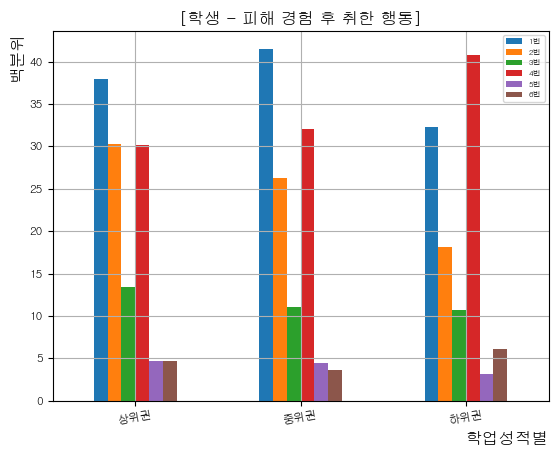

<Figure size 1500x1000 with 0 Axes>

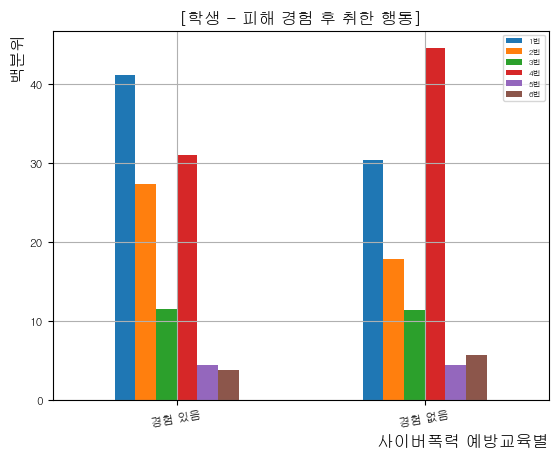

In [26]:
graph2_stu(gender, '성별')
graph2_stu(school, '학령별')
graph2_stu(area, '거주지역별')
graph2_stu(hour, '인터넷 이용 시간별')
graph2_stu(family, '가정형편별')
graph2_stu(score, '학업성적별')
graph2_stu(edu, '사이버폭력 예방교육별')